,Value
Date,
1929-12-31,0.137203
1930-12-31,0.059896
1931-12-31,0.073319
1932-12-31,0.087777
1933-12-31,0.081680
...,...
2012-12-31,0.023910
2013-12-31,0.023695
2014-12-31,0.020988


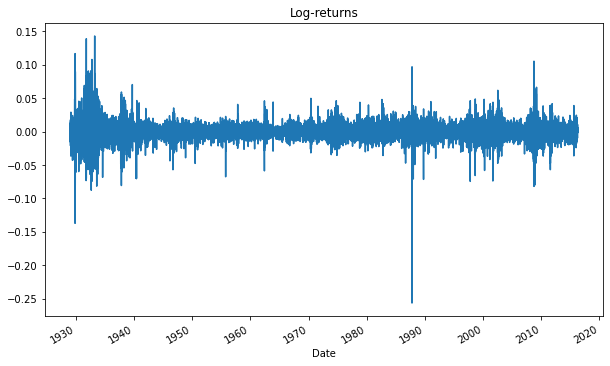

In [6]:
#This program applies the Block Maxima method to annual losses of DJIA

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev
from scipy import stats
from scipy.stats import kstest

import quandl 
df = quandl.get("BCB/UDJIAD1", start_date="1929-01-01", end_date="2018-12-31")

log_returns = np.log(1 + df.pct_change())
log_returns.plot(figsize=(10, 6),legend = False, title='Log-returns');

max_loss= -log_returns.resample('Y').min()

max_loss


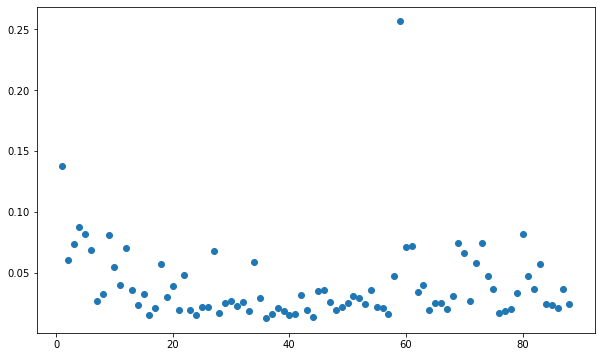

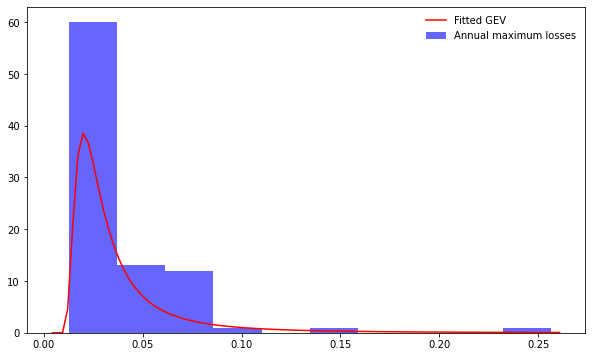

Shape
0.54260248823203
Location
0.024357564214084332
Scale
0.010833982655728137


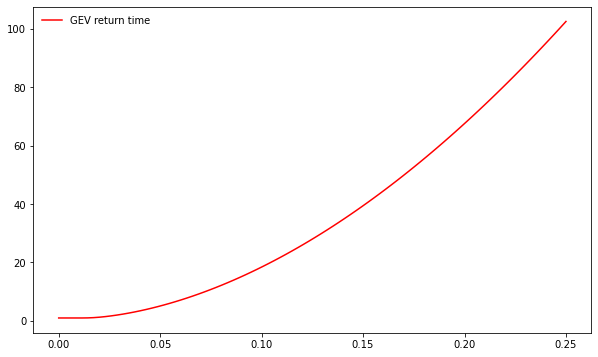

Return time (years) of an annual maximum loss higher than 10 percent =18.434


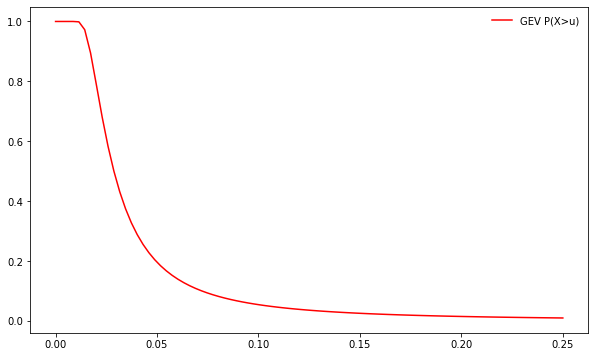

Probability of an annual maximum loss higher than 10 percent =0.054


In [9]:
max_loss=np.array(max_loss)

t = np.linspace(1,np.size(max_loss),np.size(max_loss))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, max_loss,"o")
plt.show()

fit= gev.fit(max_loss)

fig, ax = plt.subplots(figsize=(10, 6))
m=np.max(max_loss)
#plot the fit
shape, loc, scale = gev.fit(max_loss)
l = loc + scale / shape
x = np.linspace(l+0.00001, l+0.00001+m, num=100)
plt.plot(x, gev.pdf(x, *fit),color='r', label='Fitted GEV')
plt.hist(max_loss, alpha=0.6,color='blue', label='Annual maximum losses')
ax.legend(loc='best', frameon=False)
#x.plot(t, pdf)
plt.show()

print('Shape')
shape=-shape
print(shape)

print('Location')

print(loc)

print('Scale')

print(scale)
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 0.25, num=len(max_loss))

time=1/(1-gev.cdf(x,*fit))

plt.plot(x,time,color='r', label='GEV return time')

ax.legend(loc='best', frameon=False)
plt.show()



ret=1/(1-gev.cdf(0.10,*fit))
print('Return time (years) of an annual maximum loss higher than 10 percent =%.3f' %ret )


fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 0.25, num=len(max_loss))

prob=(1-gev.cdf(x,*fit))

plt.plot(x,prob,color='r', label='GEV P(X>u)')

ax.legend(loc='best', frameon=False)
plt.show()

prob=(1-gev.cdf(0.10,*fit))
print('Probability of an annual maximum loss higher than 10 percent =%.3f' %prob)
